# Movies

You need to study the Russian film distribution market and identify current trends. Pay attention to the films that have received government support.

## Exploratory data analisys of data on the Russian film distribution



### Step 1. Open the data files and combine them into one dataframe.

Combine the data in such a way that all objects from the `mkrf_movies` dataset are necessarily included in the resulting dataframe.

Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

Unloading both dataframes

In [3]:
movies.sort_values('puNumber').head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN
3962,Небесный тихоход (новая цветная версия),111000110,2010-01-14T12:00:00.000Z,Художественный,"Киностудия ""Ленфильм"", ЗАО ""Киновидеообъединен...","СССР, Россия",И.Цветов (режиссер ч/б фильма - С.Тимошенко),"ЗАО ""Киновидеообъединение ""Крупный план""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,8.0,"комедия,военный"
4768,И не было лучше брата,111000111,2011-01-13T12:00:00.000Z,Художественный,"ООО ""Ибрус"" при поддержке Киностудии ""Азербай...",Россия - Азербайджан,М.Ибрагимбеков,"М.Ибрагимбеков, А.Швыдкой, Д.Шуфутинский",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,детектив
729,"Детский юмористический киножурнал ""Ералаш"", вы...",111000112,2012-01-16T12:00:00.000Z,Художественный,"ООО ""Ералаш""",Россия,"В.Панжев, Г.Курлаев, И.Белостоцкий, М.Сулейман...","ООО ""Ералаш""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия"
1128,Тайна перевала Дятлова,111000113,2013-01-17T12:00:00.000Z,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,Ренни Харлин,"А.Роднянский, С.Мелькумов, С.Беспалов, Киа Джэм",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.1,"ужасы,фантастика"


In [4]:
shows = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_shows.csv')
pd.options.display.float_format = '{:,.1f}'.format

In [5]:
shows.head()

,puNumber,box_office
0,111000113,"2,450.0"
1,111000115,"61,040.0"
2,111000116,"153,030,013.4"
3,111000117,"12,260,956.0"
4,111000118,"163,684,057.8"


Checking the size of the tables

In [6]:
movies.shape

(7486, 15)

In [7]:
shows.shape

(3158, 2)

When trying to merge tables, an error appeared, which indicates that it is impossible to combine data due to different types in the puNumber column

In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [9]:
shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


There is a difference between the data types. The data type in the movies dataframe also just didn't change to int32 because of the text value. Let's try to find it by sorting the data

In [10]:
movies['puNumber'].sort_values()

804      111004112
3962     111000110
4768     111000111
729      111000112
1128     111000113
           ...    
4355     226017410
3992     226019110
1011     231001012
5249     231001111
1797           нет
Name: puNumber, Length: 7486, dtype: object

We found the value "no". Let's check what's with the data in this row

In [11]:
movies['puNumber'] = movies['puNumber'].replace('нет', '0')

Since the task requires saving all the data in the movies table, we will change the data type in the movies table in the puNumber column

In [12]:
movies['puNumber'] = movies['puNumber'].astype('int64')

In [13]:
df = movies.merge(shows, on='puNumber', how='left')
df.columns

Index(['title', 'puNumber', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

### Step 2. Data Preprocessing

#### Step 2.1. Check the data types

- Check the data types in the date frame and convert them where necessary.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

First of all, you need to change the show_start_date data type from object to datetime64[ns]. But before that, it is necessary to correct the value in the column and discard the extra 5 characters

In [15]:
df['show_start_date'].unique()

array(['2015-11-27T12:00:00.000Z', '2016-09-13T12:00:00.000Z',
       '2016-10-10T12:00:00.000Z', ..., '2019-12-24T12:00:00.000Z',
       '2019-12-28T12:00:00.000Z', '2019-12-30T12:00:00.000Z'],
      dtype=object)

In [16]:
df['show_start_date'] = df['show_start_date'].str.replace('.000Z', '', regex=True)

In [17]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%d %H:%M')
df['show_start_date']

0      2015-11-27 12:00:00
1      2016-09-13 12:00:00
2      2016-10-10 12:00:00
3      2016-06-10 12:00:00
4      2015-07-29 12:00:00
               ...        
7481   2019-12-23 12:00:00
7482   2019-12-24 12:00:00
7483   2019-12-28 12:00:00
7484   2019-12-30 12:00:00
7485   2019-12-30 12:00:00
Name: show_start_date, Length: 7486, dtype: datetime64[ns]

You also need to change the data type in the rating column. To do this, you first need to bring the data to one view. Let's bring everything to an assessment on a 10-point scale

In [18]:
#unique values before correction
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [19]:
df['ratings'] = df['ratings'].replace('%', '', regex=True)
df['ratings'] = df['ratings'].astype('float')
df.loc[df['ratings'] > 10, 'ratings'] = df.loc[df['ratings'] > 10, 'ratings'] / 10
df['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

#### Step 2.2. Examine the gaps in the dataframe

- Explain why you filled in the blanks in a certain way or why you didn't do it.

In [20]:
df.isna().sum().sort_values(ascending=False)

refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
box_office               4328
genres                    976
ratings                   967
producer                  568
film_studio                18
director                    9
production_country          2
title                       0
puNumber                    0
show_start_date             0
type                        0
age_restriction             0
dtype: int64

In [21]:
df['refundable_support'].unique()

array([         nan, 0.000000e+00, 5.000000e+07, 2.600000e+07,
       3.000000e+07, 1.500000e+07, 1.000000e+07, 2.000000e+07,
       7.153119e+06, 2.500000e+07, 4.000000e+07, 6.000000e+07,
       4.400000e+07, 2.900000e+07, 4.100000e+07, 3.600000e+07,
       3.500000e+06, 5.000000e+06, 1.900000e+07, 9.000000e+06,
       1.100000e+08, 1.700000e+07, 7.500000e+07, 1.500000e+08,
       3.800000e+07, 1.000000e+08, 5.500000e+07, 7.000000e+06,
       7.346881e+06, 8.000000e+06, 1.150000e+08, 3.500000e+07,
       1.800000e+08, 2.800000e+07, 8.000000e+07])

Replace the missing values in the refundable_support, non-refundable_support, budget columns with -1

In [22]:
df['refundable_support'] = df['refundable_support'].fillna(-1)

In [23]:
df['nonrefundable_support'].unique()

array([           nan, 2.65000000e+07, 2.60000000e+07, 1.07847945e+08,
       2.80000000e+07, 2.50000000e+07, 1.00000000e+08, 4.65022990e+07,
       7.50000000e+07, 3.40000000e+07, 3.00000000e+07, 4.00000000e+07,
       2.30000000e+07, 4.50000000e+07, 5.65790550e+07, 2.55000000e+07,
       2.75100000e+07, 1.00000000e+07, 2.40000000e+07, 2.45000000e+07,
       2.70000000e+07, 5.00000000e+06, 9.00000000e+07, 2.00000000e+07,
       7.00000000e+07, 9.70000000e+07, 2.44500000e+07, 5.00000000e+07,
       0.00000000e+00, 6.00000000e+07, 2.75000000e+07, 2.69500000e+07,
       1.10000000e+08, 1.50000000e+07, 5.90000000e+07, 2.50000000e+08,
       3.70000000e+07, 3.50000000e+07, 2.01452850e+07, 2.59000000e+07,
       6.00000000e+06, 3.92104482e+08, 2.52000000e+07, 2.29040000e+07,
       2.90000000e+07, 5.10000000e+07, 4.70000000e+06, 5.30000000e+06,
       2.17000000e+07, 2.49860000e+07, 2.53450000e+07, 1.33000000e+08,
       1.75000000e+08, 3.01239150e+07, 2.85000000e+07, 3.00000000e+08,
      

In [24]:
df['nonrefundable_support'] = df['nonrefundable_support'].fillna(0)

In [25]:
df['budget'] = df['budget'].fillna(0)

In [26]:
df['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

Replace the missing values with "no"

In [27]:
df['financing_source'] = df['financing_source'].fillna('No')

In [28]:
df.isna().sum().sort_values(ascending=False)

box_office               4328
genres                    976
ratings                   967
producer                  568
film_studio                18
director                    9
production_country          2
title                       0
puNumber                    0
show_start_date             0
type                        0
age_restriction             0
refundable_support          0
nonrefundable_support       0
budget                      0
financing_source            0
dtype: int64

In [29]:
df[df['director'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,-1.0,0.0,0.0,No,NaN,NaN,"44,350.0"
1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,-1.0,0.0,0.0,No,NaN,NaN,NaN
3840,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,-1.0,0.0,0.0,No,NaN,NaN,NaN
4052,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,-1.0,0.0,0.0,No,NaN,NaN,NaN
4298,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,-1.0,0.0,0.0,No,NaN,NaN,NaN
4415,Bon Jovi. The Circle Tour,126001710,2010-11-11 12:00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,-1.0,0.0,0.0,No,7.9,"концерт,музыка",NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,-1.0,0.0,0.0,No,4.0,"мультфильм,комедия",NaN
4923,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25 12:00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,-1.0,0.0,0.0,No,NaN,NaN,NaN
4942,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11 12:00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,-1.0,0.0,0.0,No,6.7,"концерт,музыка",NaN


In [30]:
df[df['box_office'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,-1.0,0.0,0.0,No,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,-1.0,0.0,0.0,No,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,-1.0,0.0,0.0,No,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,-1.0,0.0,0.0,No,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,-1.0,0.0,0.0,No,6.8,"фантастика,боевик,триллер",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,-1.0,0.0,0.0,No,NaN,NaN,NaN
7482,Звериная ярость,121037819,2019-12-24 12:00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,-1.0,0.0,0.0,No,5.4,"боевик,триллер",NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,-1.0,0.0,0.0,No,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,-1.0,0.0,0.0,No,NaN,NaN,NaN


#### Step 2.3. Examine the duplicates in the dataframe
- Check if there are duplicates in the data. Describe the reasons that could have influenced the appearance of duplicates.

In [31]:
df_title = df['title'].value_counts().reset_index()
df_title[df_title['title'] >= 2]

,index,title
0,День святого Валентина_,5
1,Кошки против собак: Месть Китти Галор,4
2,Знакомство с Факерами 2.,4
3,Рапунцель: Запутанная история,4
4,Секс в большом городе 2,4
...,...,...
553,Мисс Поттер,2
554,Слепота.,2
555,Машина времени в джакузи 2,2
556,Мученицы,2


There are a lot of duplicates in the title column. I believe this is due to the premiere of films in several countries. Since show_start_date is different

In [32]:
df[df['title'] == 'День святого Валентина_']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3902,День святого Валентина_,221083810,2010-07-15 12:00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,-1.0,0.0,0.0,No,6.7,"мелодрама,комедия",NaN
3991,День святого Валентина_,221068010,2010-05-14 12:00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,-1.0,0.0,0.0,No,6.7,"мелодрама,комедия",NaN
4070,День святого Валентина_,121002210,2010-02-03 12:00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,-1.0,0.0,0.0,No,6.7,"мелодрама,комедия",NaN
4196,День святого Валентина_,221136210,2010-11-30 12:00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,-1.0,0.0,0.0,No,6.7,"мелодрама,комедия",NaN
5070,День святого Валентина_,221066410,2010-06-01 12:00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,-1.0,0.0,0.0,No,6.7,"мелодрама,комедия",NaN


Let's check the data

In [33]:
df['show_start_date'].value_counts()

2010-12-17 12:00:00    96
2014-12-01 12:00:00    71
2014-12-24 12:00:00    61
2016-06-07 12:00:00    41
2013-12-19 12:00:00    39
                       ..
2017-05-25 12:00:00     1
2018-03-05 12:00:00     1
2015-03-13 12:00:00     1
2018-03-17 12:00:00     1
2010-05-24 12:00:00     1
Name: show_start_date, Length: 1965, dtype: int64

We can see some days with more than 30 movies released

In [34]:
df[df['show_start_date'] == '2010-12-17 12:00:00']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4579,Продавец,221156410,2010-12-17 12:00:00,Художественный,Гари Санчез Продакшнс,США,Нил Бреннан,"Уилл Фаррел, Крис Хенчи",«16+» - для детей старше 16 лет,-1.0,0.0,0.0,No,6.2,комедия,NaN
4580,Девушка по вызову.,221156610,2010-12-17 12:00:00,Художественный,"2929 Продакшнс,Эндинет филмс, Экстеншион 765",США,Стивен Содерберг,Марк Кубан,«16+» - для детей старше 16 лет,-1.0,0.0,0.0,No,6.5,драма,NaN
4581,Алекс и Эмма,221156910,2010-12-17 12:00:00,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,-1.0,0.0,0.0,No,6.4,"мелодрама,комедия",NaN
4582,Дорога /По новелле Кормака МкКарфи/,221157110,2010-12-17 12:00:00,Художественный,"Дименшн Филмс, Род Ребел, Чокстоун Пикчерз",США,Джон Хиллкоут,Паула Мэй Шварц,«18+» - запрещено для детей,-1.0,0.0,0.0,No,7.2,драма,NaN
4583,Безумцы,221157210,2010-12-17 12:00:00,Художественный,"Овертуре Филмз, Партиписиант Медиа, Пенн Стейш...",США - ОАЭ,Брек Айзнер,Майкл Агиляр,«18+» - запрещено для детей,-1.0,0.0,0.0,No,7.9,драма,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4674,Мисс Конгениальность,221162910,2010-12-17 12:00:00,Художественный,"Уорнер Бразерс, Касл Рок Интертейнмент, Фортис...",США-Австралия,Дональд Петри,Сандра Буллок,«12+» - для детей старше 12 лет,-1.0,0.0,0.0,No,7.1,"боевик,комедия,криминал",NaN
4675,Огненная стена,221162110,2010-12-17 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Бикон...",США-Австралия,Ричард Лонкрейн,"Эрмиан Бернштейн, Джонатан Шестак",«16+» - для детей старше 16 лет,-1.0,0.0,0.0,No,6.3,"триллер,криминал",NaN
4677,Неадекватные люди,111011410,2010-12-17 12:00:00,Художественный,"ООО ""Синема Прайм Фильм""",Россия,Р.Каримов,"М.Кукушкин, А.Тарасов, А.Торопцев",«16+» - для детей старше 16 лет,-1.0,0.0,0.0,No,7.2,"драма,комедия",NaN
4678,Мантикора.,111011510,2010-12-17 12:00:00,Художественный,"ООО ""Студия спецэффектов ""Ацидум""",Россия,Вл.Китт,В.Музыченков,«16+» - для детей старше 16 лет,-1.0,0.0,0.0,No,1.1,триллер,NaN


It's strange that so many films are released in one day. I can assume that this may be the date of the film's appearance in the database or publication on a streaming service

Let's check the repeats in the puNumber column

In [35]:
df['puNumber'].value_counts()

221054410    2
221154310    2
221048915    1
121004611    1
121014411    1
            ..
121009015    1
111004115    1
211047015    1
121011015    1
124010719    1
Name: puNumber, Length: 7484, dtype: int64

#### Step 2.4. Examine the categorical values

- See what a common problem occurs in almost all categorical columns;
- Fix the problematic values in the `type` field.

In [36]:
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

There are extra spaces at the beginning of the line, you need to delete them

In [37]:
df['type'] = df['type'].str.strip()
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

In [38]:
df['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

In [39]:
df['production_country'] = df['production_country'].str.strip()
df['production_country'] = df['production_country'].str.replace(' - ', '-')
df['production_country'] = df['production_country'].str.replace('-', ', ')

In [40]:
df['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', nan, 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,мел

I found that there are problems with data recording in the categorical columns production_country, type. There are extra commas

#### Step 2.5. Check the quantitative values

- Check whether suspicious data is found in such columns. What is the best way to deal with such data?

In [41]:
df['refundable_support'] = df['refundable_support'] / 1000000
df['nonrefundable_support'] = df['nonrefundable_support'] / 1000000
df['budget'] = df['budget'] / 1000000

Let's show the histograms

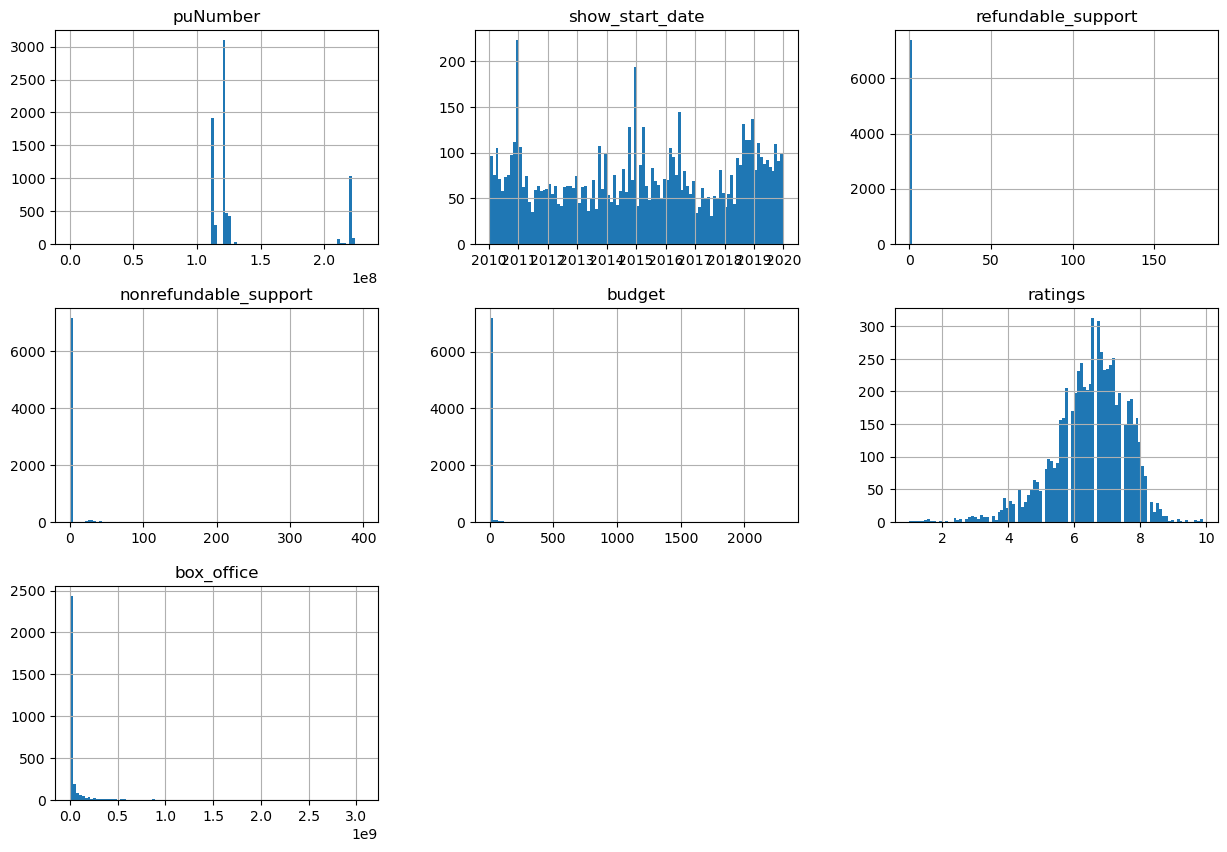

In [42]:
df.hist(figsize=(15, 10), bins=100)
plt.show()

For a categorical feature, we will show a barplot 

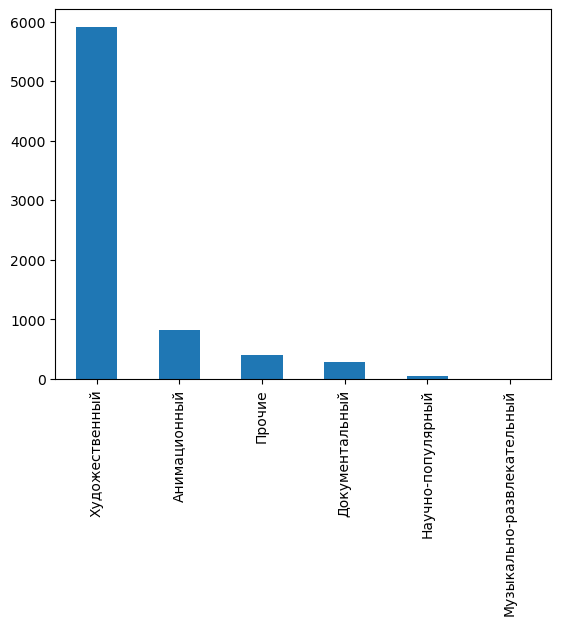

In [43]:
df['type'].value_counts().plot.bar()
plt.show()

We see a lot of zeros in the refundable_support, non-refundable_support, budget columns. Let's build histograms without zeros

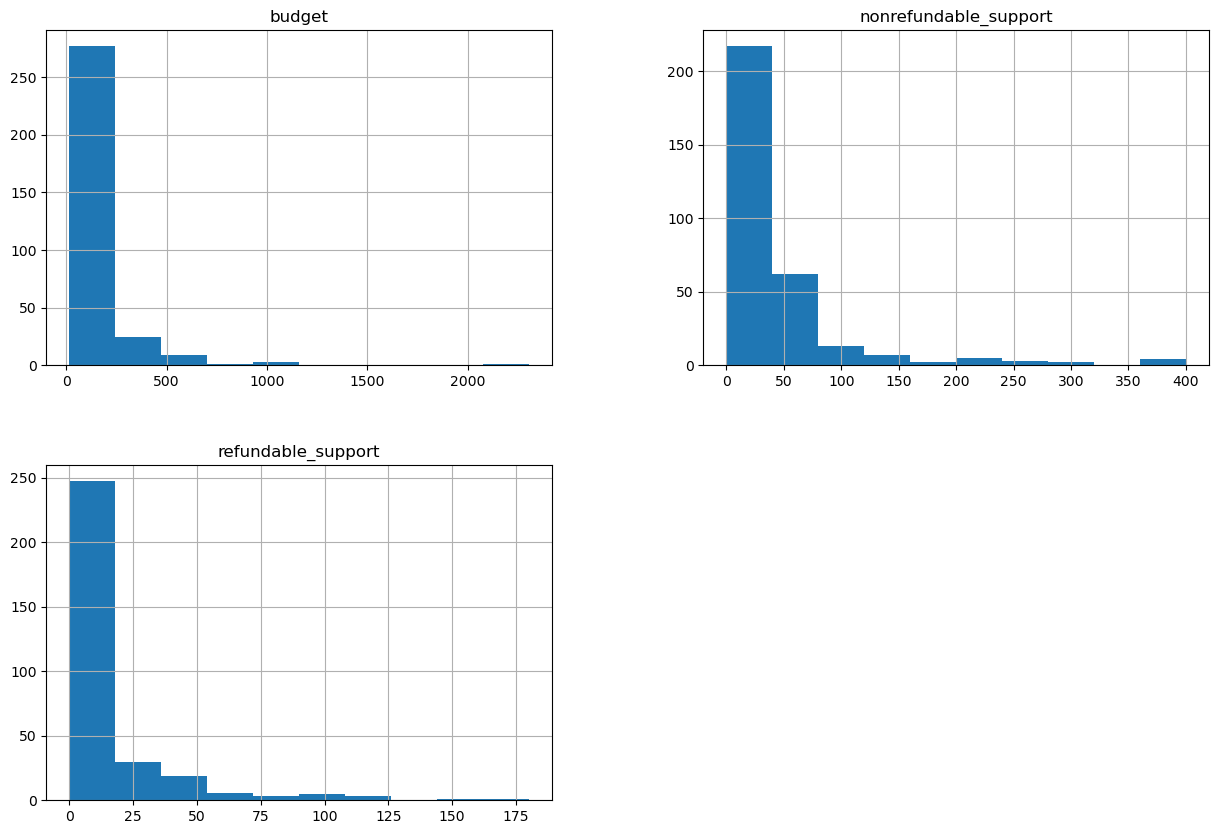

In [44]:
df[df['budget'] != 0][['budget', 'nonrefundable_support', 'refundable_support']].hist(figsize=(15, 10))
plt.show()

In [45]:
df['budget'].sort_values().tail(10)

3255     528.4
6549     563.8
5653     590.2
2920     635.3
3351     684.2
7171     779.9
7474     944.0
7464     980.0
5437   1,032.9
7114   2,305.1
Name: budget, dtype: float64

The value of 2305 million is clearly knocked out. This is the movie "The Secret of the Dragon Seal". Wikipedia states that the film's budget is 2.8 billion, which is at least commensurate with our value

In [46]:
df[df['budget'] == 2305.074303]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7114,Тайна Печати Дракона,111012819,2019-09-12 12:00:00,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...","Россия, Китай",О.Степченко,"С.Сельянов, А.Петрухин",«6+» - для детей старше 6 лет,180.0,90.0,"2,305.1",Фонд кино,5.8,"приключения,фэнтези","333,597,059.6"


The first thing that catches your eye is the lack of data in the box_office column

In [47]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,-0.0,0.0,0.0,No,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,-0.0,0.0,0.0,No,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,-0.0,0.0,0.0,No,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,-0.0,0.0,0.0,No,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,-0.0,0.0,0.0,No,6.8,"фантастика,боевик,триллер",NaN


#### Step 2.6. Add new columns





- Create a column with information about the rental year. Select the year from the premiere date of the film.

In [48]:
df['year'] = df['show_start_date'].dt.year
df['year'].head()

0    2015
1    2016
2    2016
3    2016
4    2015
Name: year, dtype: int64

- Create two columns: with the name and surname of the main director and the main genre of the film. The columns will include the first values from the list of directors and genres, respectively.

In [49]:
def cheef_director(s):
    l = str(s).split(',')
    return l[0].strip()

In [50]:
df['cheef_director'] = df['director'].apply(cheef_director)
df['cheef_director'].head()

0        Кевин Костнер
1            Е.Матвеев
2    Тимур Бекмамбетов
3    Тимур Бекмамбетов
4    Тимур Бекмамбетов
Name: cheef_director, dtype: object

In [51]:
df['main_genre'] = df['genres'].apply(cheef_director)
df['main_genre'].head()

0        боевик
1         драма
2    фантастика
3    фантастика
4    фантастика
Name: main_genre, dtype: object

- Calculate what proportion of the total budget of the film is government support.

In [52]:
df['portion_of_gov_budget'] = (df['refundable_support'] + df['nonrefundable_support']) / df['budget']

In [53]:
(df['refundable_support'] + df['nonrefundable_support']).unique()

array([-1.00000000e-06,  2.65000000e+01,  2.60000000e+01,  1.07847945e+02,
        2.80000000e+01,  2.50000000e+01,  1.50000000e+02,  4.65022990e+01,
        7.50000000e+01,  3.40000000e+01,  5.60000000e+01,  7.00000000e+01,
        2.30000000e+01,  4.50000000e+01,  5.65790550e+01,  2.55000000e+01,
        3.00000000e+01,  2.75100000e+01,  6.00000000e+01,  1.00000000e+01,
        2.40000000e+01,  2.45000000e+01,  2.70000000e+01,  2.00000000e+01,
        9.00000000e+01,  8.00000000e+01,  9.70000000e+01,  2.44500000e+01,
        5.00000000e+00,  5.00000000e+01,  3.70000000e+01,  3.51531190e+01,
        2.75000000e+01,  2.69500000e+01,  5.50000000e+01,  1.60000000e+02,
        1.50000000e+01,  4.40000000e+01,  5.90000000e+01,  2.50000000e+02,
        6.30000000e+01,  6.60000000e+01,  3.44500000e+01,  5.01452850e+01,
        3.50000000e+01,  2.59000000e+01,  4.00000000e+01,  6.50000000e+01,
        6.00000000e+00,  4.42104482e+02,  2.52000000e+01,  5.89040000e+01,
        2.35000000e+01,  

In [54]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,cheef_director,main_genre,portion_of_gov_budget
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,-0.0,0.0,0.0,No,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик,-inf
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,-0.0,0.0,0.0,No,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма,-inf
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,-0.0,0.0,0.0,No,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,-inf
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,-0.0,0.0,0.0,No,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,-inf
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,-0.0,0.0,0.0,No,6.8,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика,-inf


In [55]:
df[df['refundable_support'] > 0][['refundable_support', 'nonrefundable_support', 'budget']]

,refundable_support,nonrefundable_support,budget
1870,50.0,100.0,220.6
1987,26.0,30.0,80.0
2005,30.0,40.0,252.5
2142,30.0,30.0,500.0
2288,15.0,5.0,90.1
...,...,...,...
7456,25.0,35.0,160.0
7464,100.0,400.0,980.0
7466,100.0,0.0,190.0
7474,100.0,400.0,944.0


In [56]:
df['portion_of_gov_budget'].value_counts()

-inf    7154
inf       17
0.6        6
0.7        5
0.5        5
        ... 
0.2        1
0.2        1
0.4        1
0.5        1
0.7        1
Name: portion_of_gov_budget, Length: 283, dtype: int64

Replace the gaps and infinity with -1

In [57]:
df['portion_of_gov_budget'].replace([np.inf, -np.inf], 0, inplace=True)
df['portion_of_gov_budget'] = df['portion_of_gov_budget'].fillna(-1)

In [58]:
df['portion_of_gov_budget'].value_counts()

0.0    7171
0.6       6
0.7       5
0.7       5
0.5       5
       ... 
0.7       1
0.4       1
0.3       1
0.6       1
0.7       1
Name: portion_of_gov_budget, Length: 282, dtype: int64

### Step 3. Conduct a research analysis of the data


- Look at how many films were released each year. Please note that cinema rental data is not known for all films. Calculate the proportion of films with the specified information about the box office in cinemas.

Let's create a dataframe in which we will take into account only those films in which the value in the box_office column is greater than zero

In [59]:
df_cinema = df[df['box_office'] > 0]

In [60]:
df_cinema.shape[0] / df.shape[0] * 100

41.86481432006412

The criterion for the release of the film is that the value in the box_office column is greater than zero. In this case, we have information about 42% of the films from the entire dataframe

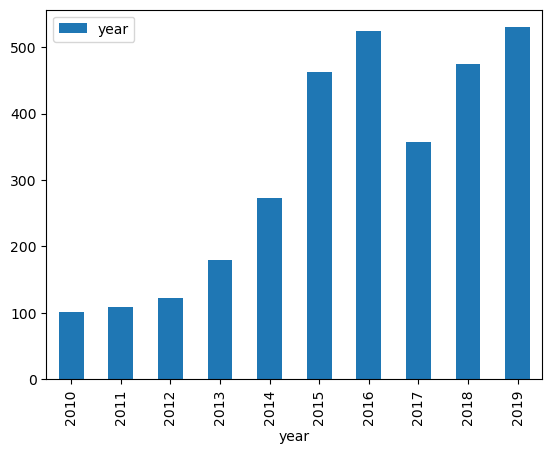

In [61]:
df_cinema.groupby('year').agg({'year': 'count'}).plot.bar()
plt.show()

We see a clear increase in the release of films from 2010 to 2015. Further, the number of films increases and decreases again without any one-sided dynamics

- Study how the dynamics of rental has changed over the years. In which year was the minimum amount of fees? And the maximum?

For convenience, we divide the values in the box_office column by 1 million

In [62]:
df['box_office'] = df['box_office'] / 1000000

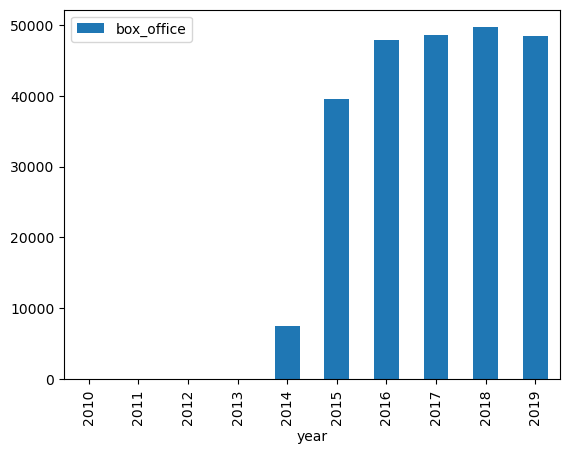

In [63]:
df.groupby('year').agg({'box_office': 'sum'}).plot.bar()
#df.plot.bar()
plt.show()

The distribution looks rather strange. There is a feeling that I have missed something, or there are errors in the data

- Use the summary table to calculate the average and median amount of fees for each year.

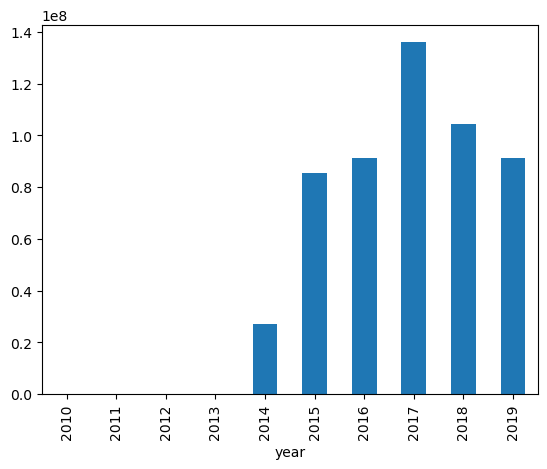

In [64]:
year_grouped = df_cinema.groupby('year').agg({'box_office': ['mean', 'median']})
year_grouped.columns = ['mean', 'median']
year_grouped['mean'].plot.bar()
plt.show()

The median and the mean differ significantly from each other. This tells us that there are films that have a much higher budget than the average

- Determine if the age limit of the audience affects ("6+", "12+", "16+", "18+" etc.) for the film's box office collections in the period from 2015 to 2019? Which age-restricted films have raised the most money at the box office? Does the picture change depending on the year? If so, guess what it might be related to.

In [65]:
df_cinema['age_restriction'].unique()

array(['«12+» - для детей старше 12 лет', '«6+» - для детей старше 6 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории',
       '«18+» - запрещено для детей'], dtype=object)

Let's build a barplot depending on the amount of fees from the age category.

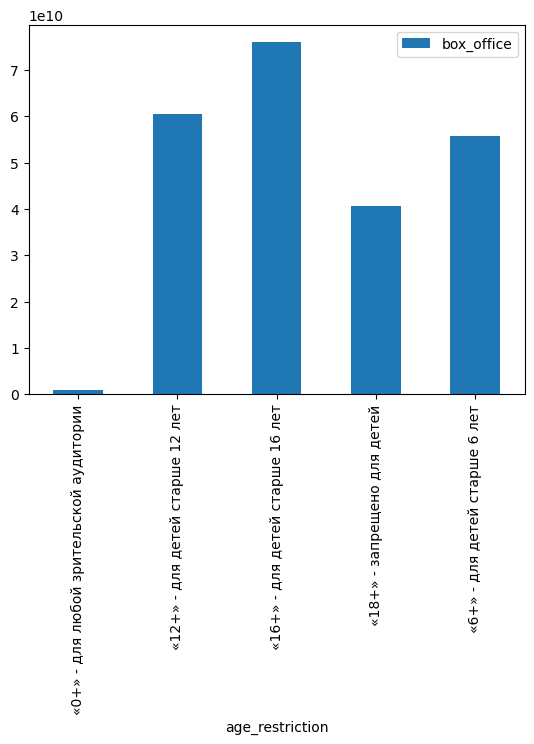

In [66]:
df_cinema[(df_cinema['year'] <= 2019) & (df_cinema['year'] >= 2015)].groupby('age_restriction').agg({'box_office': 'sum'}).plot.bar()
plt.show()

As you can see, the highest-grossing films have a rating of 16+, the lowest fees are in the 0+ category

Let's check what happens if we group it by the average value

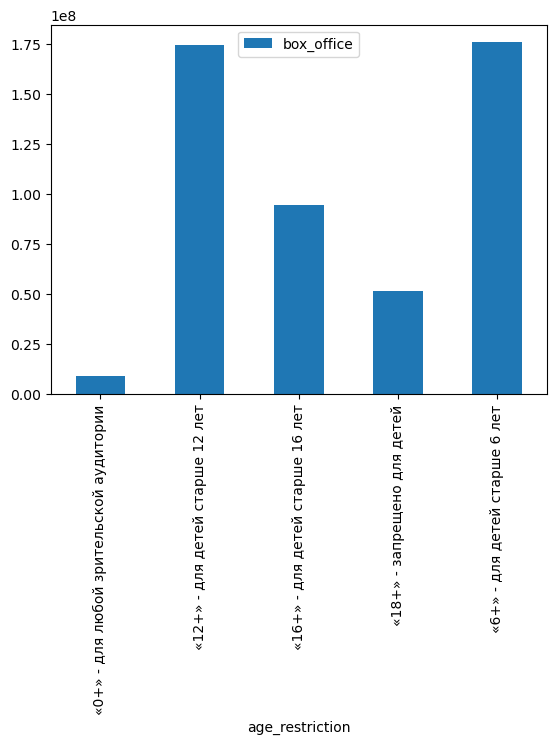

In [67]:
df_cinema[(df_cinema['year'] <= 2019) & (df_cinema['year'] >= 2015)].groupby('age_restriction').agg({'box_office': 'mean'}).plot.bar()
plt.show()

The picture is different here. On average, films for categories 6+ and 12+ collect more. But I believe that there are fewer of them than 16+ films, which is why they win in total. Let's check it out

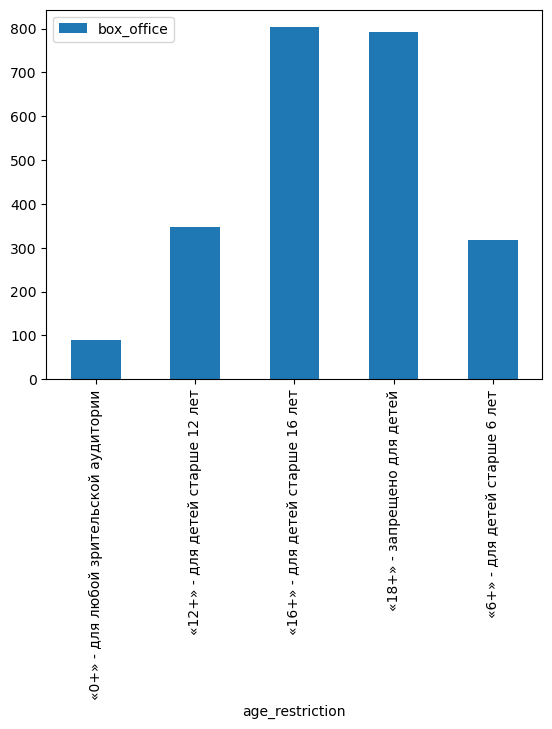

In [68]:
df_cinema[(df_cinema['year'] <= 2019) & (df_cinema['year'] >= 2015)].groupby('age_restriction').agg({'box_office': 'count'}).plot.bar()
plt.show()

All right. There are 16+ movies more than the rest

Let's group the data by type of age restrictions, then group it by year and display it on each individual histogram

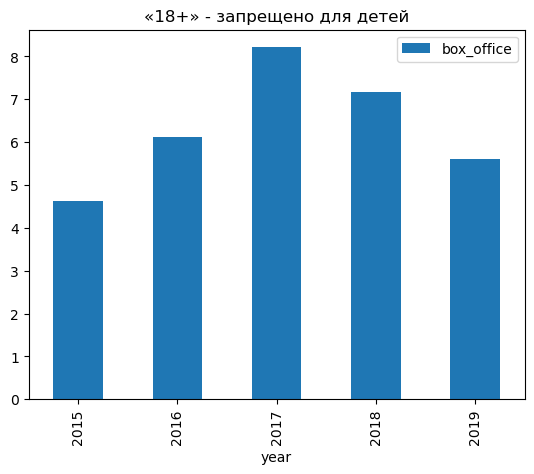

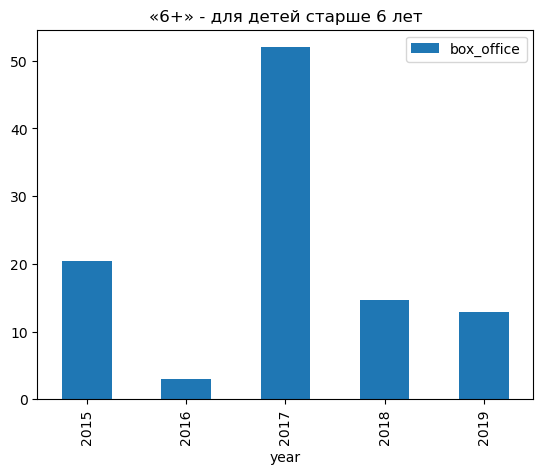

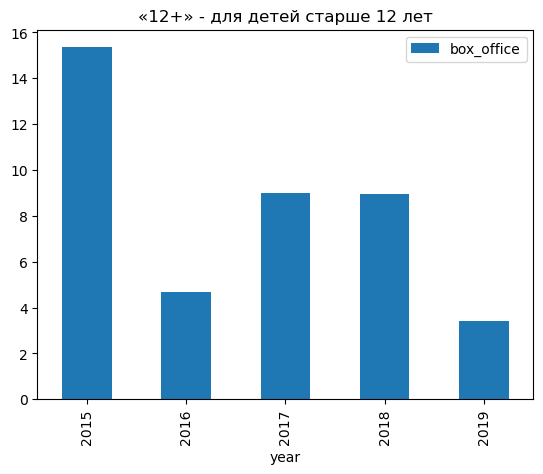

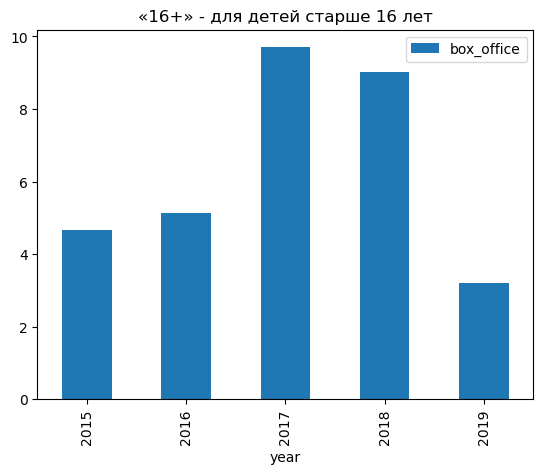

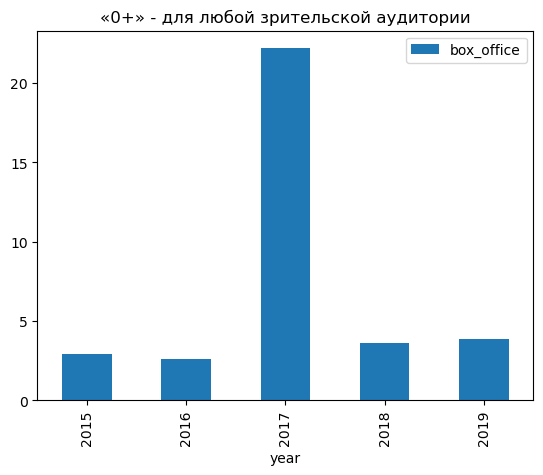

In [69]:
for i in list(df['age_restriction'].unique()):
    h = df[(df['year'] <= 2019) & (df['year'] >= 2015) & (df['age_restriction'] == i)].groupby('year').agg({'box_office': 'median'})
    h.plot.bar()
    plt.title(i)

Here we can say that in all age categories except 12+, the peak occurred in 2017. For the 12+ category, the peak was in 2015

### Step 4. Research films that have received government support

There are no specific instructions and tasks at this stage — look for interesting patterns in the data. Look at how much money is being allocated to support cinema. Check if such films pay off well and what their rating is.

Let's separate the data with state support into a separate dataframe

In [70]:
df_gov_support = df[df['portion_of_gov_budget'] > 0]

In [71]:
corr = df_gov_support.corr().round(2)
corr

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office,year,portion_of_gov_budget
puNumber,1.0,0.0,-0.0,-0.0,0.0,0.1,-0.0,-0.0
refundable_support,0.0,1.0,0.4,0.7,0.0,0.3,0.1,-0.0
nonrefundable_support,-0.0,0.4,1.0,0.6,0.1,0.4,0.1,0.1
budget,-0.0,0.7,0.6,1.0,0.1,0.4,0.2,-0.3
ratings,0.0,0.0,0.1,0.1,1.0,0.1,0.0,-0.1
box_office,0.1,0.3,0.4,0.4,0.1,1.0,0.1,-0.1
year,-0.0,0.1,0.1,0.2,0.0,0.1,1.0,-0.1
portion_of_gov_budget,-0.0,-0.0,0.1,-0.3,-0.1,-0.1,-0.1,1.0


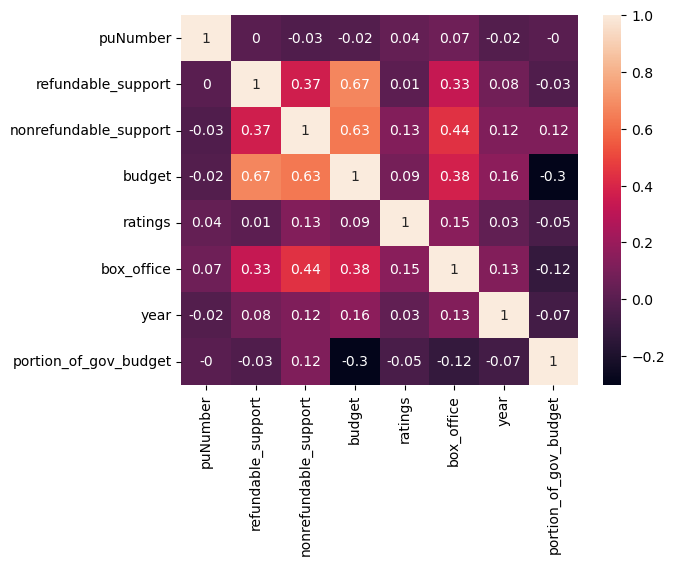

In [72]:
sns.heatmap(corr, annot = True)
plt.show()

Judging by the received heatmap, there is a dependence between the budget of the film and the amount allocated as support from the state, which is logical. 

There is a relationship between the film's fees and the budget.

Let's plot the scatter plots according to the dependencies described above

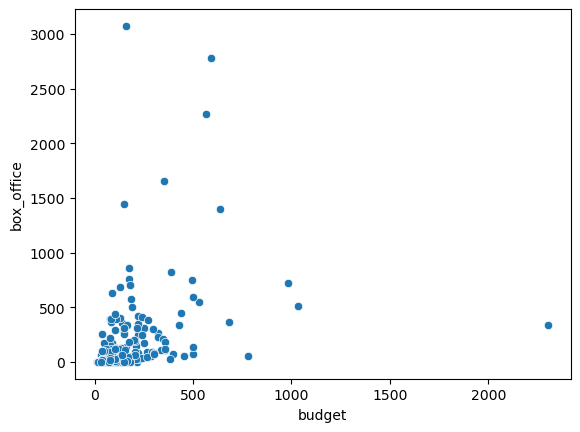

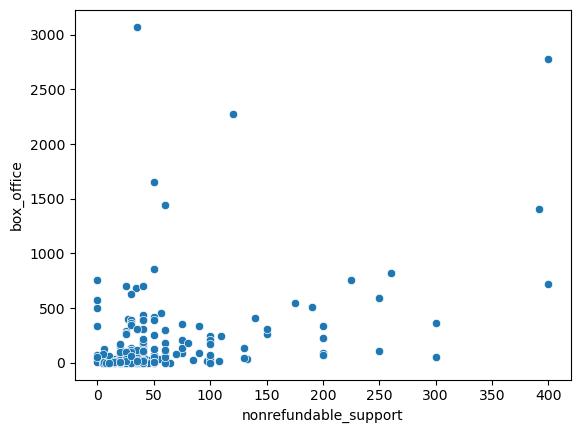

In [73]:
sns.scatterplot(data=df_gov_support, x='budget', y='box_office')
plt.show()
sns.scatterplot(data=df_gov_support, x='nonrefundable_support', y='box_office')
plt.show()
#sns.scatterplot(data=df_gov_support, x='ratings', y='box_office')
#plt.show()

Probably, you can see some dependencies, but you can't say that they are obvious

Let's determine the average rating of films with state support and the median

In [74]:
df_gov_support['ratings'].mean()

6.036666666666669

In [75]:
df_gov_support['ratings'].median()

6.2

To assess the payback, we will find the ratio of fees to the budget

In [76]:
df_gov_support.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,cheef_director,main_genre,portion_of_gov_budget
1281,Пока еще жива,111005313,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26.5,79.4,Министерство культуры,8.1,"драма,мелодрама",0.4,2013,А.Атанесян,драма,0.3
1448,Бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26.0,37.1,Министерство культуры,NaN,NaN,0.0,2014,А.Якимчук,nan,0.7
1498,Невидимки,111004213,2013-09-10 12:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107.8,176.0,Фонд кино,5.3,"комедия,фантастика",20.0,2013,Р.Давлетьяров,комедия,0.6
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28.0,40.6,Министерство культуры,4.2,драма,0.1,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.7
1792,Братья Ч,111004414,2014-04-23 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25.0,40.0,Министерство культуры,6.4,драма,0.2,2014,М.Угаров,драма,0.6


In [77]:
df_gov_support['box_office_to_budget'] = df_gov_support.loc[:, 'box_office'] / df_gov_support.loc[:, 'budget']
df_gov_support = df_gov_support[df_gov_support['box_office_to_budget'] > 0]

C:\Users\gogad\AppData\Local\Temp\ipykernel_29308\1101484600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gov_support['box_office_to_budget'] = df_gov_support.loc[:, 'box_office'] / df_gov_support.loc[:, 'budget']


In [78]:
df_gov_support['box_office_to_budget'].mean()

0.7633099908958415

In [79]:
df_gov_support['box_office_to_budget'].median()

0.14866382020781482

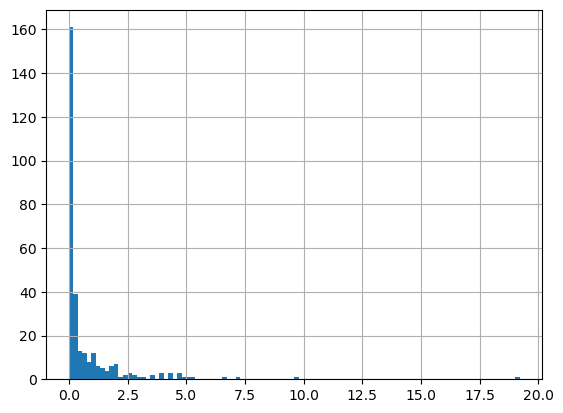

In [80]:
df_gov_support['box_office_to_budget'].hist(bins=100)
plt.show()

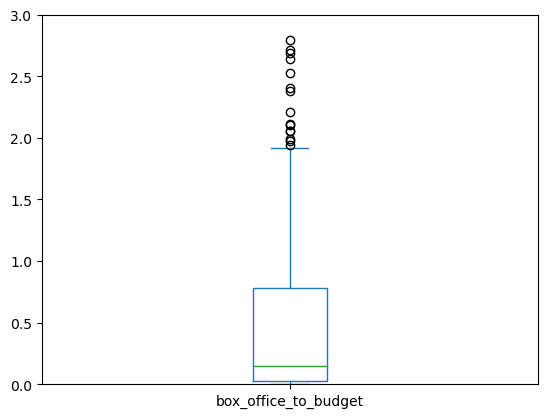

In [81]:
df_gov_support['box_office_to_budget'].plot.box()
plt.ylim(0, 3)
plt.show()

Let's look at the percentage of films that have paid off

In [82]:
df_gov_support[df_gov_support['box_office_to_budget'] >= 1].shape[0] / df_gov_support.shape[0] * 100

21.92691029900332

We can conclude that only about 22% of films with state support pay off

### Step 5. Write the general conclusion

1. Uploaded both data files. Then I combined them, saving all the lines from the mrkf_movies file.
2. I checked the data type in the dataframe and changed some of them. In the show_start_date column, I changed the data type from object to datetime64. Changed the data type in the rating column, while bringing the rating to the same scale.
3. I studied the gaps in the dataframe. I filled in what I could.
4. Studied the duplicates. I concluded that there are a lot of repetitions in the title column. I believe this is due to the premiere of films in several countries. Since show_start_date is different. There are also many duplicates in the show_start_date column. I can assume that this may be the date of the film's appearance in the database or publication on a streaming service
5. Studied the categorical data. There were implicit duplicates in the type column. Removed spaces before words. I also changed the data entry in the production_country column. Brought it to a comma-separated entry.
6. I used histograms to check quantitative values. I found many values equal to zero. Mostly in columns related to the budget. I decided not to delete anything at this stage
7. Added new columns with the name of the main director, the main genre and the year of the premiere. I calculated how much of the total budget is state support
8. We see a clear increase in the release of films from 2010 to 2015. Further, the number of films increases and decreases again without any one-sided dynamics. Of the entire dataframe, information about the film's rental is available in 42 % of cases
9. The distribution of film fees by year looks rather strange. There is a feeling that I have missed something, or there are errors in the data. Since the statistics here start from 2014.
10. By average and median value, 2017 is the most profitable year. In absolute terms, a little more was collected in 2018.
11. Determined that the highest-grossing films have a rating of 16+, the lowest fees are in the 0+ category
12. There is a weak relationship between the film's fees and the budget. There was no good correlation of the rating with other parameters. The rating has the highest correlation coefficient (0.15) with the amount of fees
13. The average rating of films with state support is slightly higher than 6.
14. To characterize the payback of films, I took the ratio of fees to the budget. On average, this proportion is 0.76. Only 22% of films with state support pay off.